## 패키지 호출

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.options.display.float_format = '{:.0f}'.format # 부동소수점 디스플레이 옵션 제거

## 데이터 불러오기

In [3]:
train = pd.read_csv("FIFA_train.csv")

In [4]:
test = pd.read_csv("FIFA_train.csv")

In [4]:
sub = pd.read_csv("../../스터디/피파 이적료 예측/submission.csv")

## 데이터 구조 및 결측치 확인

In [ ]:
 '''
 id : 선수 고유의 아이디
 name : 이름
 age : 나이 
 continent : 
 contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다 
 position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등 
 prefer_foot : 선수가 선호하는 발입니다. ex) 오른발 
 reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수 >
 stat_overall : 선수의 현재 능력치 입니다.
 stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
 stat_skill_moves : 선수의 개인기 능력치 입니다.
 value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다
 '''

* 선수 고유의 아이디 : 아이디가 선수별 이적료와 연관이 있지는 않지만 submission에 id만 입력해도 이적료를 예측해야 하기 때문에 버릴 수는 없을 것 같다
* 이름 : 데이터상 이름과 관련하여 금액이 측정되진 않을 것 같다
* 나이 : 선수들의 전성기 시절인 나이대를 찾아야 할 것 같다 40과 가까운 부폰이 젊은 선수들보다 더 받을 수 있지만 40과 가까운 다른 선수는 젊은 선수보다 덜 받을 확률이 크다
* 선수들의 국적이 포함되어 있는 대륙입니다 : 대륙별 축구선수를 많이 배출하는 곳이 있을 것이다 한국에서 유명한 선수가 3명 나올 때 유럽에선 10명 나오듯 금액의 차이가 있을 것 같다
* 선수들의 계약기간 : 계약기간이 만료와 가까울수록 싼 값에 거래할 확률이 높다
* 선수가 선호하는 포지션 : 공격수가 쌓는 포인트가 많기 때문에 쉽게 몸값을 올릴 수 있으니 포지션별 이적료를 비교해봐야 할 것 같다
* 주 발 선호도  : 주 발 선호도에 따른 금액이 상이하지 않을 경우 0과 1로만 바꿔도 될 것 같다 
* 선수의 유명세 : 유명한 선수 일수록 이적료에 큰 영향을 미치기 때문에 이적료가 높을 것 같지만 나이가 많아 적은 돈을 받는 선수가 있는지 확인 해야 할 것 같다
* 선수의 현재 능력치 : 능력치와 잠재력이 비례한 선수 일 수록 비싸겠지만 그 반대일 경우는 어떤지 확인 해봐야 될 것 같다
* 잠재력 : 잠재력은 현재 능력치가 어떻든 몇 년 뒤의 성장세를 가늠할 수 있는 수치로 이적료에 큰 영향이 있을 것 같은데 유명하지 않고 현재 오버롤이 낮다면 금액의 영향을 많이 받을 것 같다
* 개인기 능력치 : 개인기는 쇼맨쉽과 연관이 있기 때문에 쉬운 유명세를 탈 수 있는 선수일 것 같음으로 이적료에 영향이 있을 것 같다
* 이적료 : 종속변수

In [50]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5,94,94,4,110500000
1,3,De Gea,27,europe,2020,GK,right,4,91,93,1,72000000
2,7,L. Suárez,31,south america,2021,ST,right,5,91,91,3,80000000
3,8,Sergio Ramos,32,europe,2020,DF,right,4,91,91,3,51000000
4,9,J. Oblak,25,europe,2021,GK,right,3,90,93,1,68000000


In [51]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5,94,94,4,110500000
1,3,De Gea,27,europe,2020,GK,right,4,91,93,1,72000000
2,7,L. Suárez,31,south america,2021,ST,right,5,91,91,3,80000000
3,8,Sergio Ramos,32,europe,2020,DF,right,4,91,91,3,51000000
4,9,J. Oblak,25,europe,2021,GK,right,3,90,93,1,68000000


In [17]:
train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [18]:
test.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [12]:
print(train.shape)
print(test.shape)
print(sub.shape)

(8932, 12)
(8932, 12)
(3828, 2)


# EDA

In [23]:
train.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')

## age column 확인하기

In [52]:
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932,8932,8932,8932,8932,8932,8932
mean,7967,25,1,67,72,2,2778673
std,4844,5,0,7,6,1,5840982
min,0,16,1,47,48,1,10000
25%,3752,21,1,63,68,2,375000
50%,7696,25,1,67,72,2,825000
75%,12082,28,1,72,76,3,2600000
max,16948,40,5,94,94,5,110500000


#### 연령대 별 이적료 확인

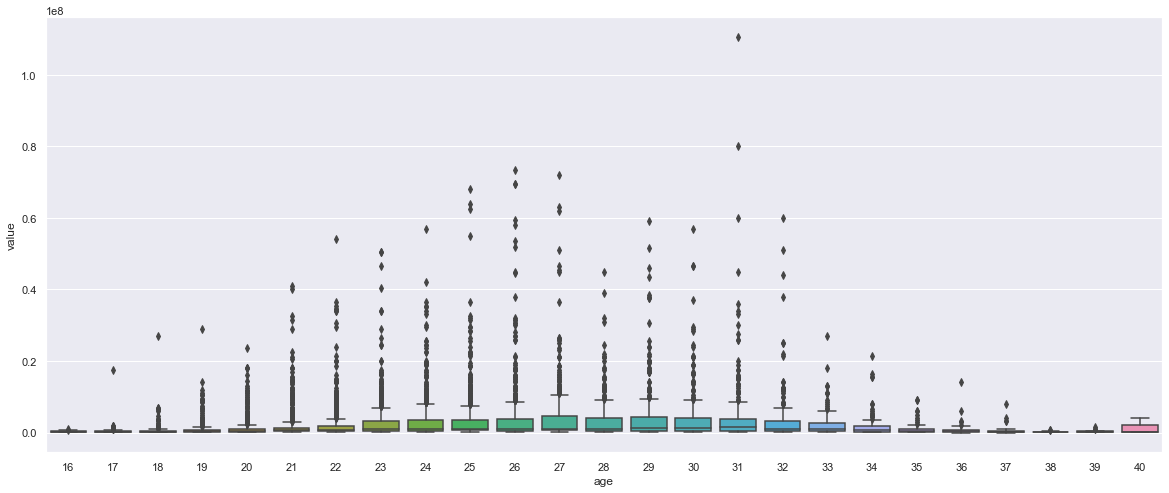

In [31]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.boxplot(x = "age", y = "value", data = train)

plt.show()

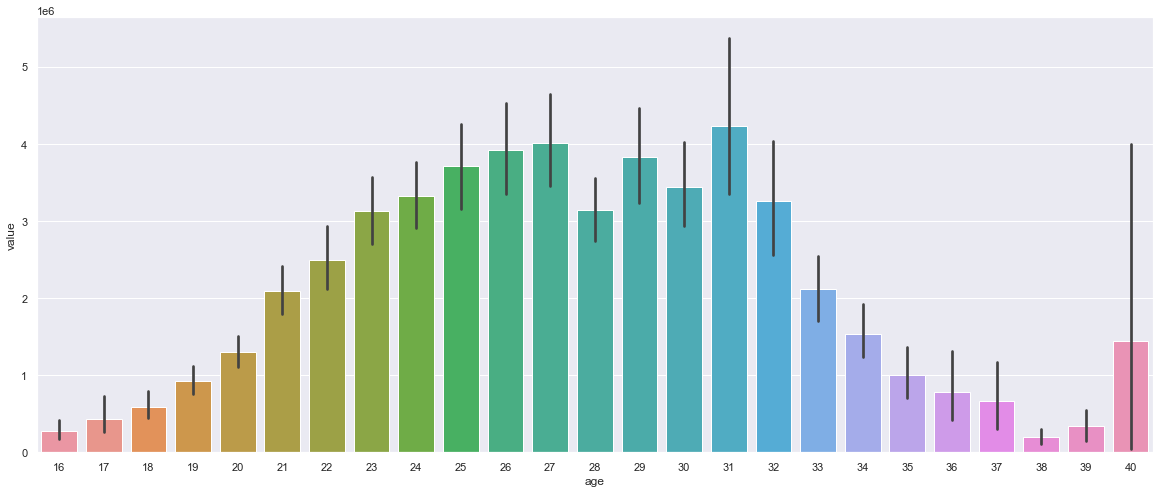

In [48]:
sns.barplot(x = "age" , y = 'value' , data = train);

#### 유망주보다 은퇴 전 장년기 선수의 연봉이 미세한 차이지만 더 적다. 나이가 적을 때는 잠재력에 의해 연봉의 액수가 차이가 나지만, 나이가 많을수록
#### 피지컬에 의해 연봉의 차이가 있다. 32세부터 쭉 그래프가 하향을 나타내지만 40세 때 갑자기 치솟는 이유는 골키퍼의 전성기는 필드 플레이어보다 길기 때문이다.
#### 그래서 16세와 40세를 비교 해보면 16세의 선수는 오버롤 48, 포텐셜 66으로 5만 달러 > 40세 선수 오버롤 66, 포텐셜 66 4만 달러 == 현재 기량이 더 좋은 40세가 더 적은 연봉을 받는다

In [79]:
train[train["age"] == 16]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,season
6071,10804,W. Geubbels,16,europe,2023,ST,right,1,64,86,3,1000000,0
6537,11756,Pelayo Morilla,16,europe,2022,MF,left,1,63,81,3,725000,0
6902,12495,H. Massengo,16,europe,2021,MF,right,1,62,75,2,450000,0
7015,12747,Y. Verschaeren,16,europe,2021,MF,right,1,62,83,3,650000,0
7958,14723,Y. Begraoui,16,europe,2019,ST,right,1,59,81,2,350000,0
7976,14769,J. Lahne,16,europe,2020,ST,right,1,59,77,2,300000,0
8098,15030,J. Italiano,16,oceania,2019,MF,right,1,58,79,3,280000,0
8160,15186,S. Steijn,16,europe,"Jun 30, 2019",MF,right,1,58,72,3,250000,0
8418,15792,B. Nygren,16,europe,2020,ST,left,1,56,73,2,180000,0
8585,16174,L. D'Arrigo,16,oceania,2019,MF,right,1,54,71,2,130000,0


In [77]:
train[train["age"] == 40]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,season
23,41,G. Buffon,40,europe,2019,GK,right,4,88,88,1,4000000,4
1613,2735,S. Bertoli,40,south america,2019,GK,right,1,73,73,1,270000,4
5168,8995,B. Castillo,40,south america,2021,GK,right,1,66,66,1,40000,4


### 선수들의 나이 별 구간화

### 시즌 : 
###       0 = 유망주,
###       1 = 아직 성장할 수 있는 선수
###       2 = 전성기에 위치한 선수
###       3 = 엘리트 선수
###       4 = 장년기 선수(피지컬 보다 필드 위 지배자 또는 아카데미 내 튜터 정도의 선수)

In [6]:
train["season"] = np.where(train["age"] < 21, 0,
np.where(train["age"] < 26, 1,
np.where(train["age"] < 31, 2,
np.where(train["age"] < 36, 3, 4))))

In [206]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,season,continent2,sign_year,sign,position_section,left,right
0,0,L. Messi,31,south america,2021-01-01,ST,left,5,94,94,4,110500000,3,3,2021,1,3,1,0
1,3,De Gea,27,europe,2020-01-01,GK,right,4,91,93,1,72000000,2,1,2020,0,0,0,1
2,7,L. Suárez,31,south america,2021-01-01,ST,right,5,91,91,3,80000000,3,3,2021,1,3,0,1
3,8,Sergio Ramos,32,europe,2020-01-01,DF,right,4,91,91,3,51000000,3,1,2020,0,1,0,1
4,9,J. Oblak,25,europe,2021-01-01,GK,right,3,90,93,1,68000000,1,1,2021,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019-01-01,MF,right,1,48,63,3,60000,0,2,2019,0,2,0,1
8928,16936,C. Ehlich,19,europe,2020-01-01,DF,right,1,47,59,2,40000,0,1,2020,0,1,0,1
8929,16941,N. Fuentes,18,south america,2021-01-01,DF,right,1,47,64,2,50000,0,3,2021,1,1,0,1
8930,16942,J. Milli,18,europe,2021-01-01,GK,right,1,47,65,1,50000,0,1,2021,1,0,0,1


#### 위 그래프에서 31세 나이가 가장 많은 연봉을 받는걸로 보이나 이상치로 인해 두각 되어 보이며 선수의 전성기 시즌은 26 ~ 30세 가장 큰 기량을 나타내기 때문에 시즌 별로 보면
#### 전성기에 속한 선수들의 연봉이 더 높은 것을 알 수 있다
#### 이 그래프에서도 장년기 선수보다 유망주 선수가 더 많은 연봉을 받고있다

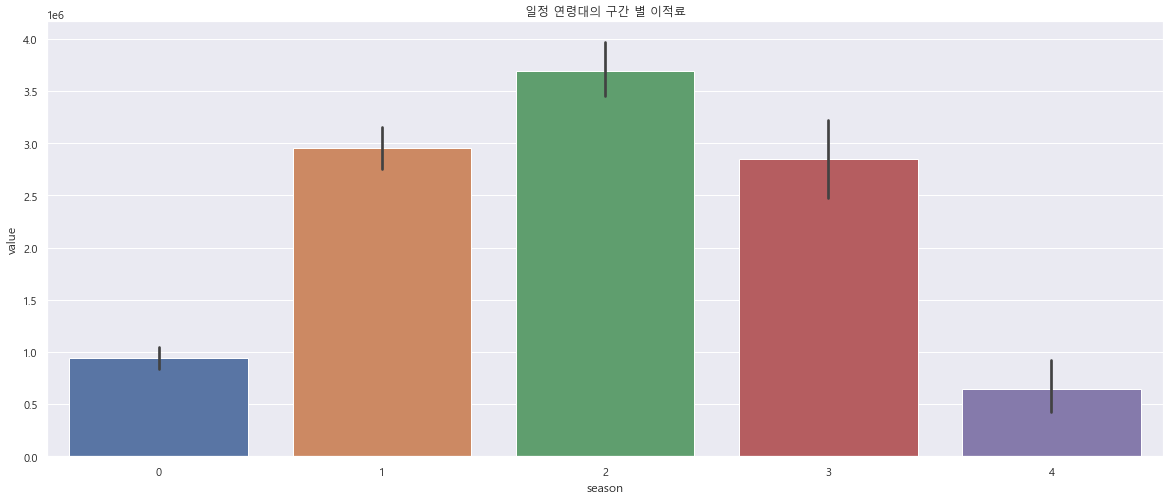

In [75]:
sns.barplot(x="season", y="value", data=train)
plt.title("일정 연령대의 구간 별 이적료")
plt.show()

## 대륙을 나타내는 컬럼 알아보기

In [87]:
train["continent"].value_counts().reset_index()

,index,continent
0,europe,5322
1,south america,1927
2,asia,787
3,africa,721
4,oceania,175


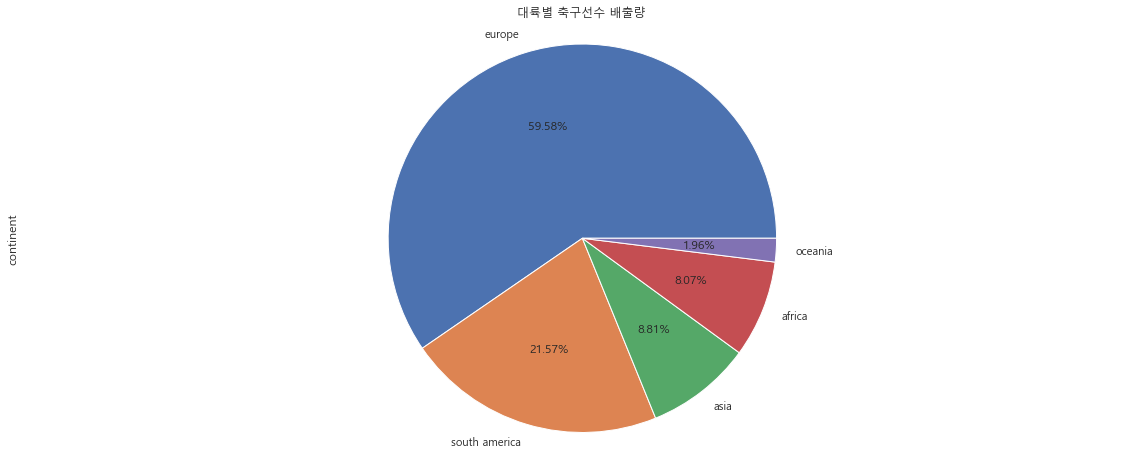

In [112]:
pie = train["continent"].value_counts()
pie.plot.pie(autopct='%.2f%%')
plt.title("대륙별 축구선수 배출량")
plt.axis('equal')
plt.show()

#### 대륙과 선수의 일정 연련대의 구간 별 이적료

<AxesSubplot:xlabel='continent,season'>

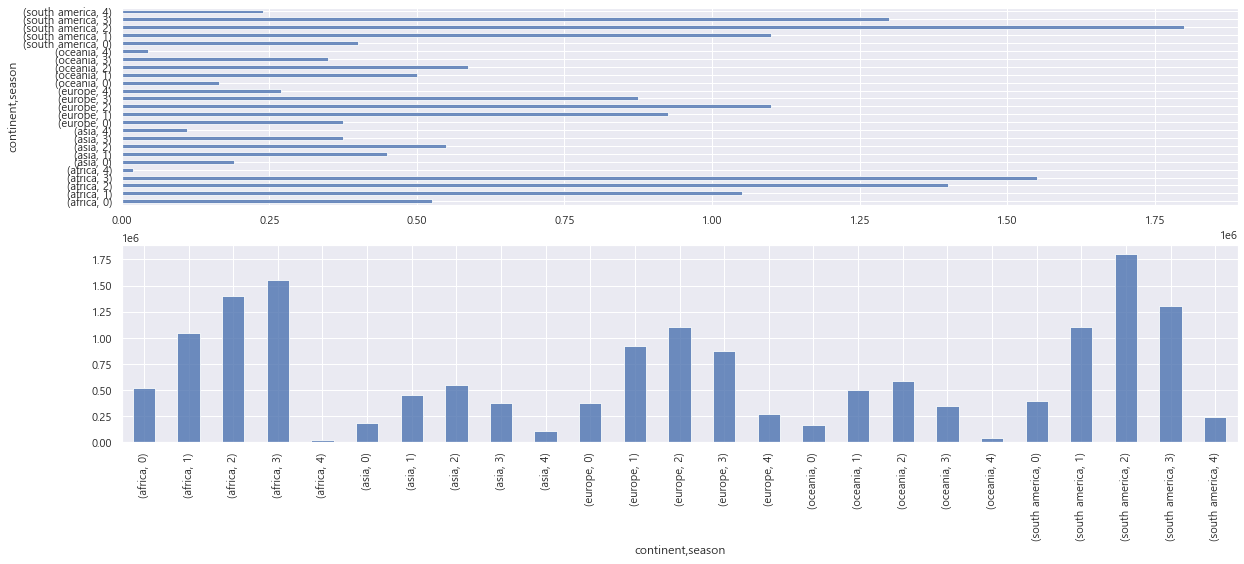

In [122]:
fig, axes = plt.subplots(2, 1)

dt = train.groupby(["continent","season"])["value"].median()

dt.plot.barh(ax=axes[0], color='b', alpha=0.8)
dt.plot.bar(ax=axes[1], color='b', alpha=0.8)


#### 대륙별 시즌을 연관지어 수치형태로 변경

In [7]:
train["continent2"] = np.where(train["continent"] == "asia", 0,
np.where(train["continent"] == "europe", 1,
np.where(train["continent"] == "africa", 2,
np.where(train["continent"] == "south america", 3,4))))

In [207]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,season,continent2,sign_year,sign,position_section,left,right
0,0,L. Messi,31,south america,2021-01-01,ST,left,5,94,94,4,110500000,3,3,2021,1,3,1,0
1,3,De Gea,27,europe,2020-01-01,GK,right,4,91,93,1,72000000,2,1,2020,0,0,0,1
2,7,L. Suárez,31,south america,2021-01-01,ST,right,5,91,91,3,80000000,3,3,2021,1,3,0,1
3,8,Sergio Ramos,32,europe,2020-01-01,DF,right,4,91,91,3,51000000,3,1,2020,0,1,0,1
4,9,J. Oblak,25,europe,2021-01-01,GK,right,3,90,93,1,68000000,1,1,2021,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019-01-01,MF,right,1,48,63,3,60000,0,2,2019,0,2,0,1
8928,16936,C. Ehlich,19,europe,2020-01-01,DF,right,1,47,59,2,40000,0,1,2020,0,1,0,1
8929,16941,N. Fuentes,18,south america,2021-01-01,DF,right,1,47,64,2,50000,0,3,2021,1,1,0,1
8930,16942,J. Milli,18,europe,2021-01-01,GK,right,1,47,65,1,50000,0,1,2021,1,0,0,1


## 날짜 별 알아보기

#### 실제 이적기간에 날짜(일)은 상관이 없기 때문에 제거, (월) 또한 여름이적 시장에 명확하게 들어가지 않기 때문에 금년도 1개의 데이터로 처리
#### 여름 이적시장 = 6.10 ~ 8.31, 겨울 이적시장 1.1 ~ 1.31

In [136]:
train["contract_until"].value_counts()

2019-01-01    2379
2021-01-01    2308
2020-01-01    2041
2022-01-01     761
2023-01-01     506
2019-06-01     501
2018-01-01     327
2018-12-01      64
2019-05-01      19
2024-01-01      12
2020-06-01       9
2025-01-01       3
2026-01-01       1
2020-05-01       1
Name: contract_until, dtype: int64

In [8]:
train["contract_until"] = pd.to_datetime(train['contract_until'])

In [9]:
train["sign_year"] = train["contract_until"].dt.year

In [9]:
train["sign_year"]

0       2021
1       2020
2       2021
3       2020
4       2021
        ... 
8927    2019
8928    2020
8929    2021
8930    2021
8931    2020
Name: sign_year, Length: 8932, dtype: int64

In [96]:
train["contract_until"].value_counts()

2019-01-01    2379
2021-01-01    2308
2020-01-01    2041
2022-01-01     761
2023-01-01     506
2019-06-01     501
2018-01-01     327
2018-12-01      64
2019-05-01      19
2024-01-01      12
2020-06-01       9
2025-01-01       3
2026-01-01       1
2020-05-01       1
Name: contract_until, dtype: int64

In [122]:
train.groupby("sign_year")["value"].median()

sign_year
2018-01     475000
2018-12     962500
2019-01     600000
2019-05    1200000
2019-06    1300000
2020-01     825000
2020-05    7500000
2020-06    2300000
2021-01     750000
2022-01    2900000
2023-01    1300000
2024-01   22750000
2025-01   17500000
2026-01   50500000
Name: value, dtype: float64

In [10]:
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글폰트

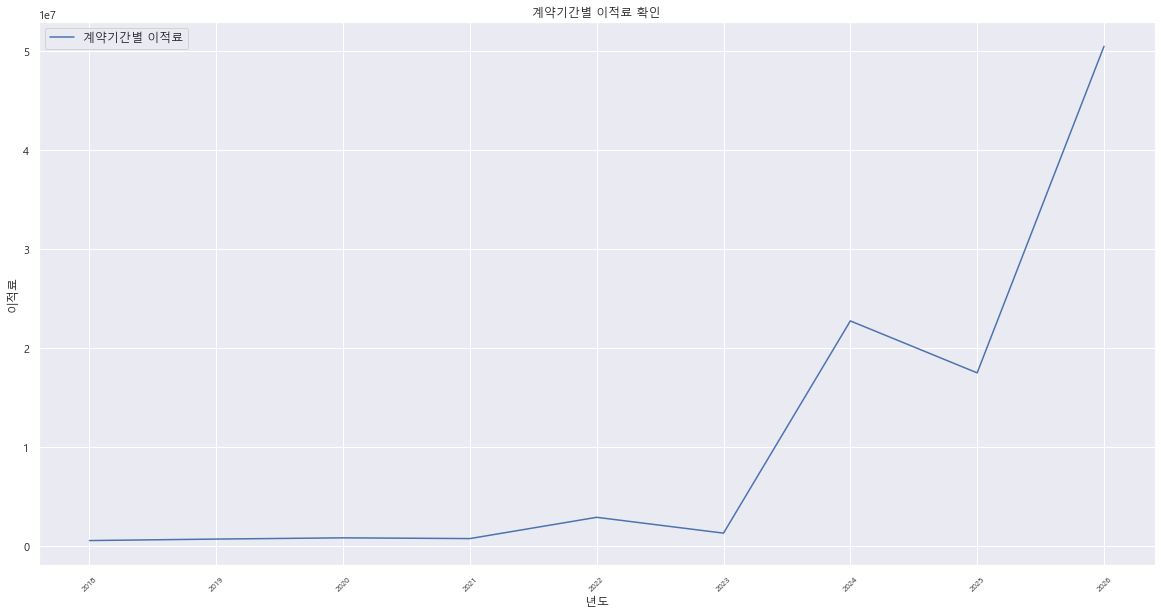

In [143]:
plt.figure(figsize=(20, 10)) # 그래프 사이즈 지정
plt.xticks(size=8, rotation=45) # x축 눈금 라벨 폰트 사이즈 8로 지정하고 45도 회전
plt.plot(train.groupby("sign_year")["value"].median())
plt.title('계약기간별 이적료 확인')
plt.xlabel('년도')
plt.ylabel('이적료')
plt.legend(labels=['계약기간별 이적료'], loc='best', fontsize=12)
plt.grid(True)
plt.show()

#### 계약기간이 현재와 멀수록 이적료가 싸고, 현재와 가까울수록 비싸졌다, 그에 맞게 구간화 시행

In [11]:
train["sign"] = np.where(train["sign_year"] < 2021, 0,
np.where(train["sign_year"] < 2024, 1, 2))

In [150]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,season,continent2,sign_year,sign
0,0,L. Messi,31,south america,2021-01-01,ST,left,5,94,94,4,110500000,3,3,2021,1
1,3,De Gea,27,europe,2020-01-01,GK,right,4,91,93,1,72000000,2,1,2020,0
2,7,L. Suárez,31,south america,2021-01-01,ST,right,5,91,91,3,80000000,3,3,2021,1
3,8,Sergio Ramos,32,europe,2020-01-01,DF,right,4,91,91,3,51000000,3,1,2020,0
4,9,J. Oblak,25,europe,2021-01-01,GK,right,3,90,93,1,68000000,1,1,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019-01-01,MF,right,1,48,63,3,60000,0,2,2019,0
8928,16936,C. Ehlich,19,europe,2020-01-01,DF,right,1,47,59,2,40000,0,1,2020,0
8929,16941,N. Fuentes,18,south america,2021-01-01,DF,right,1,47,64,2,50000,0,3,2021,1
8930,16942,J. Milli,18,europe,2021-01-01,GK,right,1,47,65,1,50000,0,1,2021,1


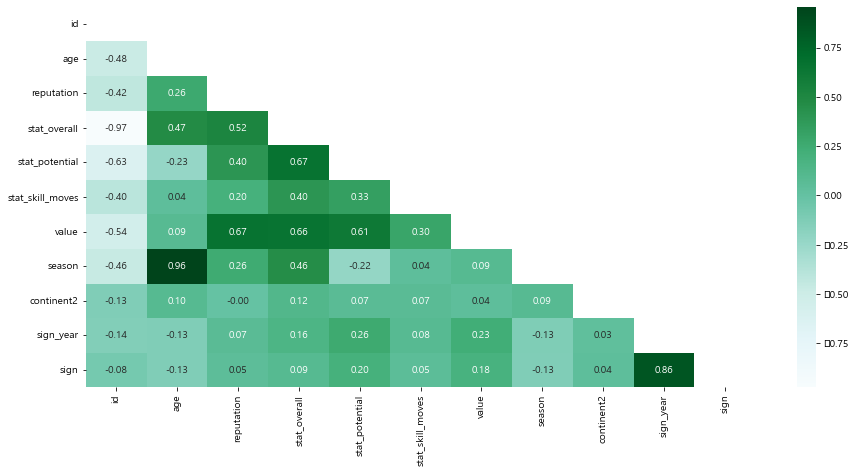

In [13]:
mask = np.zeros_like(train.corr()) 
mask[np.triu_indices_from(mask)] = True 
plt.rcParams["figure.figsize"] = (15,7) 
sns.heatmap(data = train.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='BuGn');

## 포지션별 알아보기

<AxesSubplot:xlabel='position', ylabel='value'>

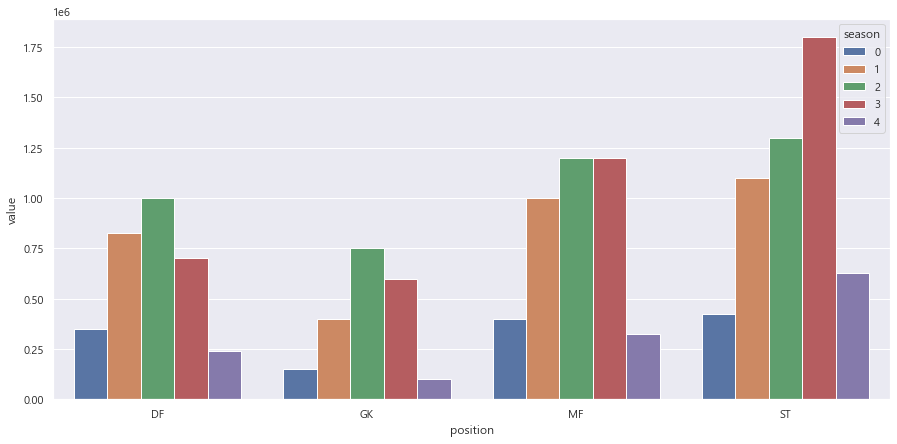

In [171]:
sns.barplot(data = train.groupby(["position", "season"], as_index = False)["value"].median(), x = "position", y = "value", hue = "season")

#### 골키퍼 0, 수비수 1, 미드필더 2, 스트라이커 3, 으로 변경

In [12]:
train["position_section"] = np.where(train["position"] == "GK", 0,
np.where(train["position"] == "DF", 1,
np.where(train["position"] == "MF", 2, 3)))

In [178]:
train.groupby("position_section")["value"].median()

position_section
0   400000
1   725000
2   925000
3   975000
Name: value, dtype: float64

## 주 발 선호도

In [186]:
train.groupby(train["prefer_foot"], as_index = False)["value"].median()

,prefer_foot,value
0,left,875000
1,right,800000


In [13]:
train_dummy = pd.get_dummies(train['prefer_foot'])

In [14]:
train = pd.concat([train,train_dummy], axis = 1)

<AxesSubplot:xlabel='reputation,stat_skill_moves'>

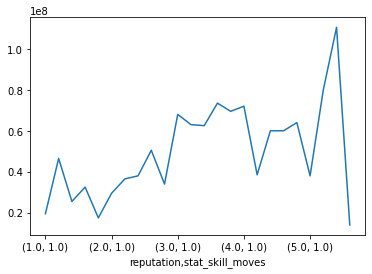

In [116]:
train.groupby(["reputation", "stat_skill_moves"])["value"].max().plot()

In [208]:
from sklearn.preprocessing import MinMaxScaler

In [209]:
scaler = MinMaxScaler()

In [30]:
train["stat_overall"]

0       94
1       91
2       91
3       91
4       90
        ..
8927    48
8928    47
8929    47
8930    47
8931    47
Name: stat_overall, Length: 8932, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stat_potential', ylabel='value'>

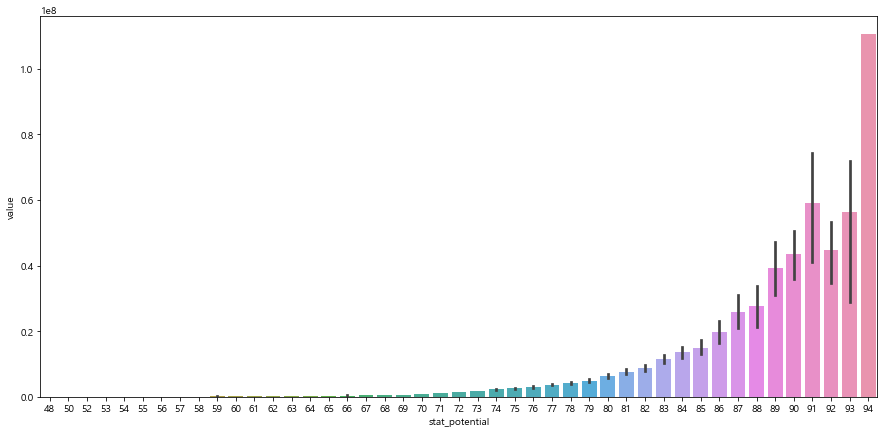

In [32]:
sns.barplot(train["stat_potential"], train["value"])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stat_overall', ylabel='value'>

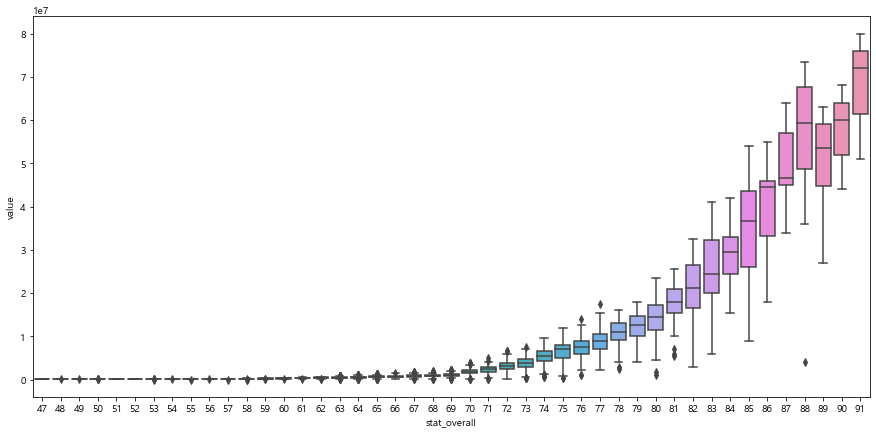

In [49]:
sns.boxplot(train["stat_overall"], train["value"])

#### 밸류가 너무 높은(이상치) 메시 데이터 삭제
#### 연령이 40세 이면서 높은 연봉을 받지만 오버롤이 88이면서 낮은 연봉을 받는 부폰 데이터 삭제

In [51]:
train[train["age"] == 40]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,season,continent2,sign_year,sign,position_section,left,right
23,41,G. Buffon,40,europe,2019-01-01,GK,right,4.0,88,88,1.0,4000000.0,4,1,2019,0,0,0,1
1613,2735,S. Bertoli,40,south america,2019-01-01,GK,right,1.0,73,73,1.0,270000.0,4,3,2019,0,0,0,1
5168,8995,B. Castillo,40,south america,2021-01-01,GK,right,1.0,66,66,1.0,40000.0,4,3,2021,1,0,0,1


In [50]:
train[train["stat_overall"] == 88]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,season,continent2,sign_year,sign,position_section,left,right
14,26,M. Salah,26,africa,2023-01-01,MF,left,3.0,88,89,4.0,69500000.0,2,2,2023,1,2,1,0
15,27,Casemiro,26,south america,2021-01-01,MF,right,3.0,88,90,2.0,59500000.0,2,3,2021,1,2,0,1
16,29,L. Insigne,27,europe,2022-01-01,ST,right,3.0,88,88,4.0,62000000.0,2,1,2022,1,3,0,1
17,30,Isco,26,europe,2022-01-01,ST,right,3.0,88,91,4.0,73500000.0,2,1,2022,1,3,0,1
18,32,Coutinho,26,south america,2023-01-01,ST,right,3.0,88,89,5.0,69500000.0,2,3,2023,1,3,0,1
19,33,P. Aubameyang,29,africa,2021-01-01,MF,right,3.0,88,88,4.0,59000000.0,2,2,2021,1,2,0,1
20,34,M. Hummels,29,europe,2021-01-01,DF,right,4.0,88,88,3.0,46000000.0,2,1,2021,1,1,0,1
21,37,H. Lloris,31,europe,2022-01-01,GK,left,4.0,88,88,1.0,36000000.0,3,1,2022,1,0,1,0
22,38,G. Higuaín,30,south america,2019-06-30,ST,right,4.0,88,88,3.0,57000000.0,2,3,2019,0,3,0,1
23,41,G. Buffon,40,europe,2019-01-01,GK,right,4.0,88,88,1.0,4000000.0,4,1,2019,0,0,0,1


In [23]:
train.drop(0, inplace = True)

In [24]:
train.drop(23, inplace = True)

<AxesSubplot:xlabel='position', ylabel='value'>

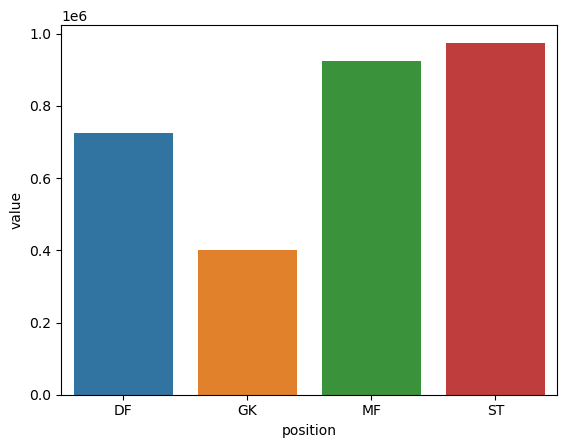

In [26]:
sns.barplot(data = train.groupby("position", as_index = False)["value"].median(), x = "position", y = "value")

In [34]:
train[["value", "name", "reputation", "stat_overall", "stat_potential"]].head(10).sort_values("value", ascending = False )

,value,name,reputation,stat_overall,stat_potential
2,80000000,L. Suárez,5,91,91
1,72000000,De Gea,4,91,93
4,68000000,J. Oblak,3,90,93
7,63000000,N. Kanté,3,89,90
6,60000000,David Silva,4,90,90
8,58000000,M. ter Stegen,3,89,92
9,53500000,T. Courtois,4,89,90
10,51500000,Sergio Busquets,4,89,89
3,51000000,Sergio Ramos,4,91,91
5,44000000,D. Godín,3,90,90


In [36]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,season,continent2,sign_year,sign,position_section,left,right
1,3,De Gea,27,europe,2020-01-01,GK,right,4,91,93,1,72000000,2,1,2020,0,0,0,1
2,7,L. Suárez,31,south america,2021-01-01,ST,right,5,91,91,3,80000000,3,3,2021,1,3,0,1
3,8,Sergio Ramos,32,europe,2020-01-01,DF,right,4,91,91,3,51000000,3,1,2020,0,1,0,1
4,9,J. Oblak,25,europe,2021-01-01,GK,right,3,90,93,1,68000000,1,1,2021,1,0,0,1
5,12,D. Godín,32,south america,2019-01-01,DF,right,3,90,90,2,44000000,3,3,2019,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019-01-01,MF,right,1,48,63,3,60000,0,2,2019,0,2,0,1
8928,16936,C. Ehlich,19,europe,2020-01-01,DF,right,1,47,59,2,40000,0,1,2020,0,1,0,1
8929,16941,N. Fuentes,18,south america,2021-01-01,DF,right,1,47,64,2,50000,0,3,2021,1,1,0,1
8930,16942,J. Milli,18,europe,2021-01-01,GK,right,1,47,65,1,50000,0,1,2021,1,0,0,1


## 유명세

#### 다른 구간화 된 피쳐들과 비교했을 때 특별히 전처리를 진행 하지 않아도 관계 없을 것으로 판단함
#### 피쳐 생성이 끝나고 정규화 작업 후 최종 상관관계를 비교해서 너무 강한 관계를 갖고 있다면 그 때 정리함

<AxesSubplot:xlabel='reputation', ylabel='count'>

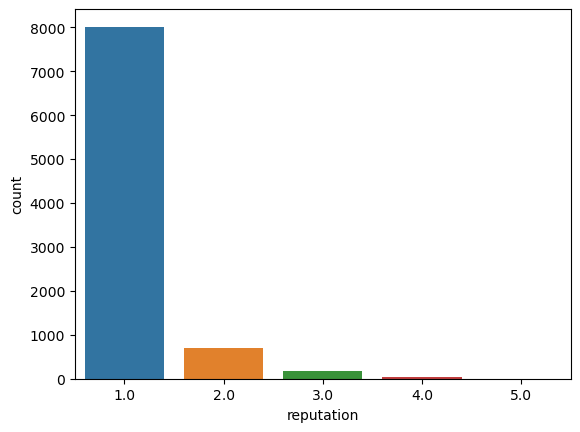

In [38]:
sns.countplot(data = train, x = "reputation")

<AxesSubplot:xlabel='season', ylabel='value'>

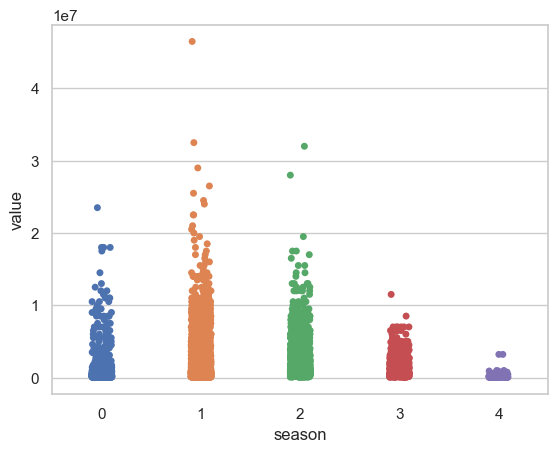

In [83]:
sns.stripplot(data = rep1, x = "season", y = "value")

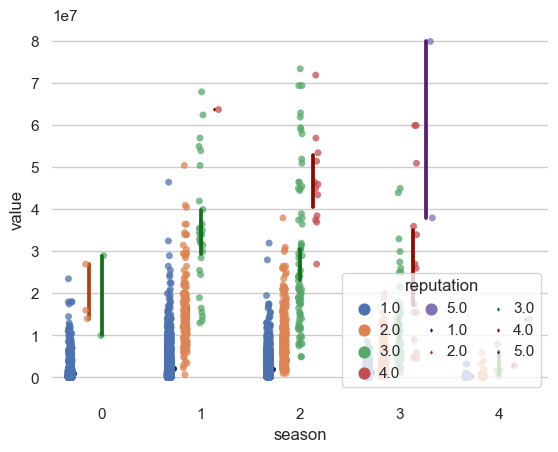

In [79]:
sns.set_theme(style="whitegrid")

# "Melt" the dataset to "long-form" or "tidy" representation
# iris = pd.melt(train, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=train, x="season", y="value", hue="reputation",
    dodge=True, alpha=.75
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=train, x="season", y="value", hue="reputation",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.25, errorbar=None
)

# Improve the legend
sns.move_legend(
    ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0
)

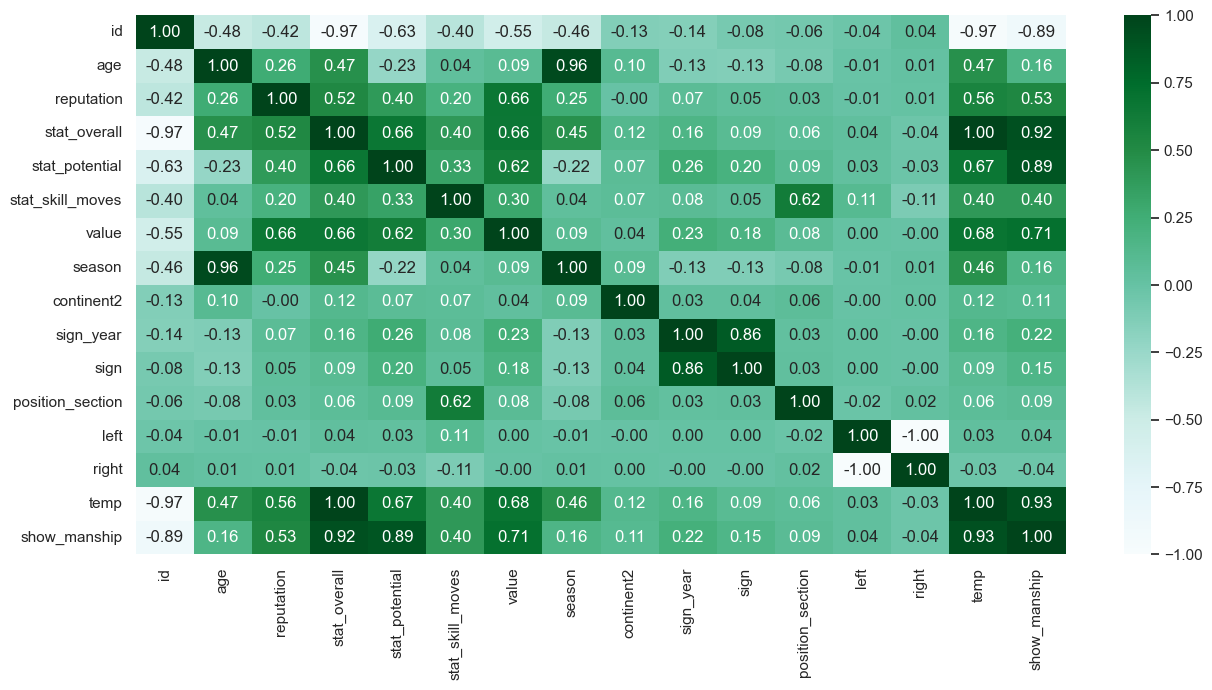

In [275]:
plt.rcParams["figure.figsize"] = (15,7) 
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=0, cmap='BuGn');

In [271]:
train["show_manship"] = ((train["reputation"] + train["stat_overall"] + train["stat_potential"]) /3).astype(int)

<Figure size 1500x800 with 0 Axes>

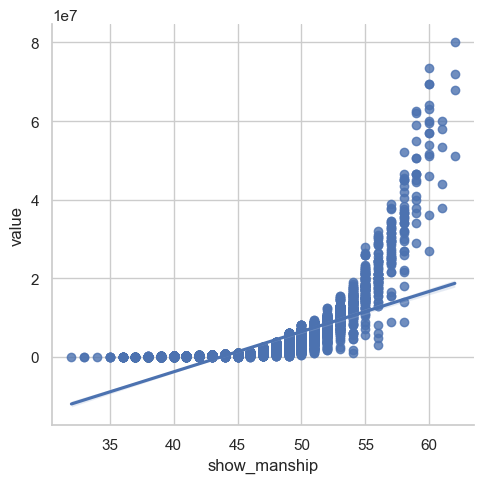

In [283]:
plt.figure(figsize=(15,8))
sns.lmplot(data=train, x='show_manship', y ='value')

In [296]:
train[["season", "continent2","sign","position_section","show_manship"]]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,season,continent2,sign_year,sign,position_section,left,right,show_manship
1,3,De Gea,27,europe,2020-01-01,GK,right,4,91,93,1,72000000,2,1,2020,0,0,0,1,62
2,7,L. Suárez,31,south america,2021-01-01,ST,right,5,91,91,3,80000000,3,3,2021,1,3,0,1,62
3,8,Sergio Ramos,32,europe,2020-01-01,DF,right,4,91,91,3,51000000,3,1,2020,0,1,0,1,62
4,9,J. Oblak,25,europe,2021-01-01,GK,right,3,90,93,1,68000000,1,1,2021,1,0,0,1,62
5,12,D. Godín,32,south america,2019-01-01,DF,right,3,90,90,2,44000000,3,3,2019,0,1,0,1,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019-01-01,MF,right,1,48,63,3,60000,0,2,2019,0,2,0,1,37
8928,16936,C. Ehlich,19,europe,2020-01-01,DF,right,1,47,59,2,40000,0,1,2020,0,1,0,1,35
8929,16941,N. Fuentes,18,south america,2021-01-01,DF,right,1,47,64,2,50000,0,3,2021,1,1,0,1,37
8930,16942,J. Milli,18,europe,2021-01-01,GK,right,1,47,65,1,50000,0,1,2021,1,0,0,1,37


## 정규화

In [298]:
from sklearn.preprocessing import MinMaxScaler

In [299]:
scaler = MinMaxScaler()

In [315]:
scaling = train[["season", "continent2","sign","position_section","show_manship"]]

In [301]:
scaler.fit(scaling)

MinMaxScaler()

In [316]:
scaler = MinMaxScaler(feature_range=(0,3))
scaler.fit(scaling)
transformed_X = scaler.transform(scaling)
train[["season", "continent2","sign","position_section","show_manship"]] = transformed_X

[[1.5  0.75 0.   0.   3.  ]
 [2.25 2.25 1.5  3.   3.  ]
 [2.25 0.75 0.   1.   3.  ]
 ...
 [0.   2.25 1.5  1.   0.5 ]
 [0.   0.75 1.5  0.   0.5 ]
 [0.   0.75 0.   3.   0.5 ]]


In [319]:
train[["season", "continent2","sign","position_section","show_manship"]] = transformed_X

## feature 지정 및 사용하지 않을 목록 제거

In [342]:
feature_drop = ["id", "name", "continent", "contract_until", "position", "prefer_foot", "reputation", "stat_overall", "stat_potential", "sign_year", "age","value"]

In [330]:
train_label = train["value"]

In [337]:
train_feature = train.drop(feature_drop, axis = 1)

In [339]:
train_feature

,stat_skill_moves,season,continent2,sign,position_section,left,right,show_manship
1,1,2,1,0,0,0,1,3
2,3,2,2,2,3,0,1,3
3,3,2,1,0,1,0,1,3
4,1,1,1,2,0,0,1,3
5,2,2,2,0,1,0,1,3
...,...,...,...,...,...,...,...,...
8927,3,0,2,0,2,0,1,0
8928,2,0,1,0,1,0,1,0
8929,2,0,2,2,1,0,1,0
8930,1,0,1,2,0,0,1,0


In [331]:
train_label

1      72000000
2      80000000
3      51000000
4      68000000
5      44000000
         ...   
8927      60000
8928      40000
8929      50000
8930      50000
8931      60000
Name: value, Length: 8930, dtype: float64